# Entity Matching for Online Marketplaces



## What is Entity Matching (EM)?

## Why is EM needed for online marketplaces?

## Exploratory Data Analysis

### Dataset Origin

### Offer Features

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from IPython.display import display, HTML

import warnings
# warnings.filterwarnings('ignore')

# load custom functions
# os.chdir('C:/Users/kyleg/Entity-Matching-in-Online-Retail')
os.chdir('H:/kgilde/Entity-Matching-in-Online-Retail')
exec(open("utility_functions.py").read())

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [31]:
# Load Data
DATA_DIRECTORY = '//files/share/goods/OI Team'
os.chdir(DATA_DIRECTORY)

train_test_feature_pairs = pd.read_csv('train_test_feature_pairs.csv')
train_test_offer_features = pd.read_csv('train_test_offer_features.csv')
train_test_normalized_features = pd.read_csv('train_test_normalized_features.csv')

There are 10 offer features that comprise 4 broad feature types.

- 7 are short-to-medium free-text attributes
    - 4 of them are types of indentifiers: gtin, mpm, sku and a generic identifier
    - 2 of them are the brand and manufacturer
    - 1 is the medium-length offer name
    
- The description is a longer free-text attribute

- The offer category has a limited number of strongly-typed values

- The price is a numeric feature

In [13]:
ALL_FEATURES = ['gtin', 'mpn', 'sku', 'identifier', 'brand', 'manufacturer', 'name', 'description', 'category', 'price']

train_test_offer_features_only = train_test_offer_features[ALL_FEATURES]
train_test_offer_features_only.head()

,gtin,mpn,sku,identifier,brand,manufacturer,name,description,category,price
0,NaN,672631b21,NaN,NaN,hp enterprise,NaN,672631 b21 hp 16gb 1x16gb sdram dimm,hp 16gb 1x16gb dual rank x4 pc3 12800r ddr3 1...,Computers_and_Accessories,155.94
1,NaN,672631b21,NaN,NaN,hp enterprise,NaN,672631 b21 hp 16gb 1x16gb sdram dimm,hp 16gb 1x16gb dual rank x4 pc3 12800r ddr3 1...,Computers_and_Accessories,155.94
2,NaN,NaN,NaN,NaN,NaN,hp,hp 16gb ddr3 sdram memory module 16 gb 1 x 16 ...,NaN,Computers_and_Accessories,NaN
3,NaN,672631b21,13825503,NaN,NaN,NaN,hpe smartmemory 16gb pc3 12800 240 pin ddr3 sd...,NaN,Computers_and_Accessories,NaN
4,NaN,672631b21,NaN,NaN,hp enterprise,NaN,672631 b21 hp 16gb 1x16gb sdram dimm,hp 16gb 1x16gb dual rank x4 pc3 12800r ddr3 1...,Computers_and_Accessories,119.95


### Sparsity & Top Domains

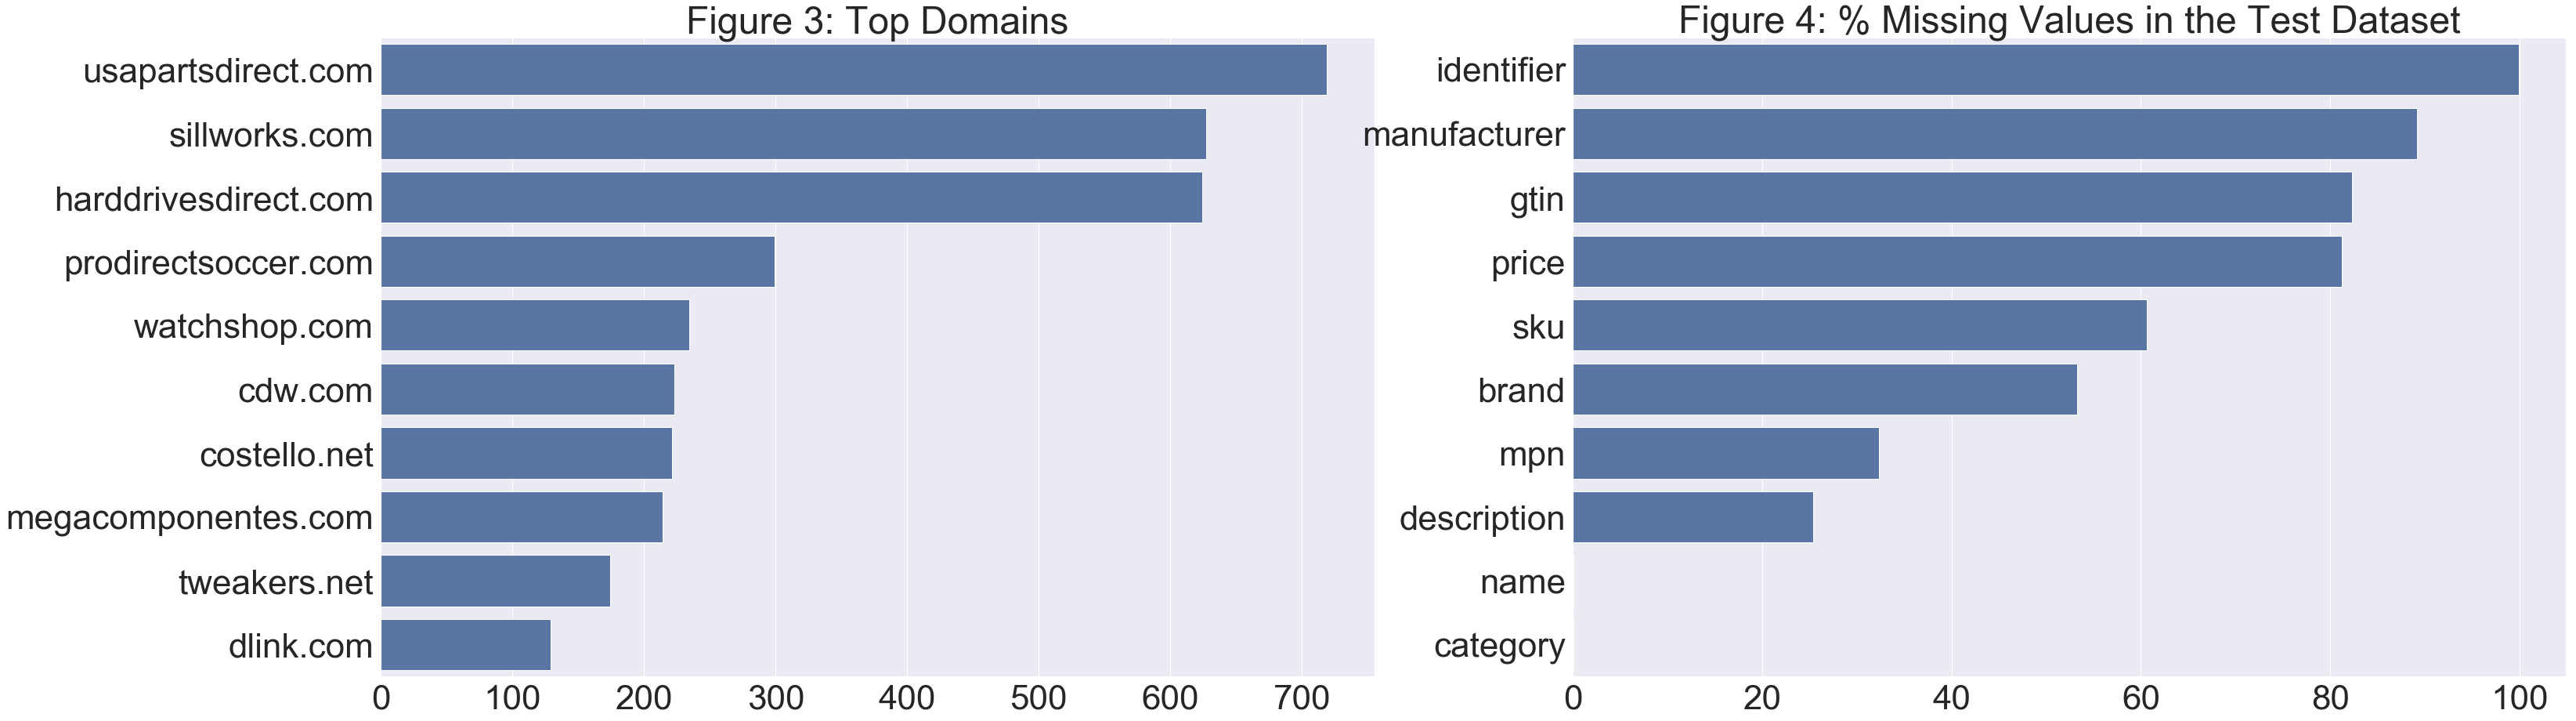

In [32]:
feature_nulls = calculate_percent_nulls(train_test_offer_features_only, print_series=False, return_series=True)

domains = train_test_offer_features.domain.str.replace('www\.|de\.', '')\
    .value_counts().head(10)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50, 15))
sns.set(font_scale=4)
plt.rcParams.update({'font.size': 45})

sns.barplot(x=domains.values, y=domains.index, 
            color="b", ax=axes[0])\
            .set_title('Figure 3: Top Domains')

sns.barplot(x=feature_nulls.values, y=feature_nulls.index, 
            color="b", ax=axes[1])\
            .set_title('Figure 4: % Missing Values in the Test Dataset')

fig.savefig("plots/feature_sparsity.png", bbox_inches = "tight")

### Training & Testing Data

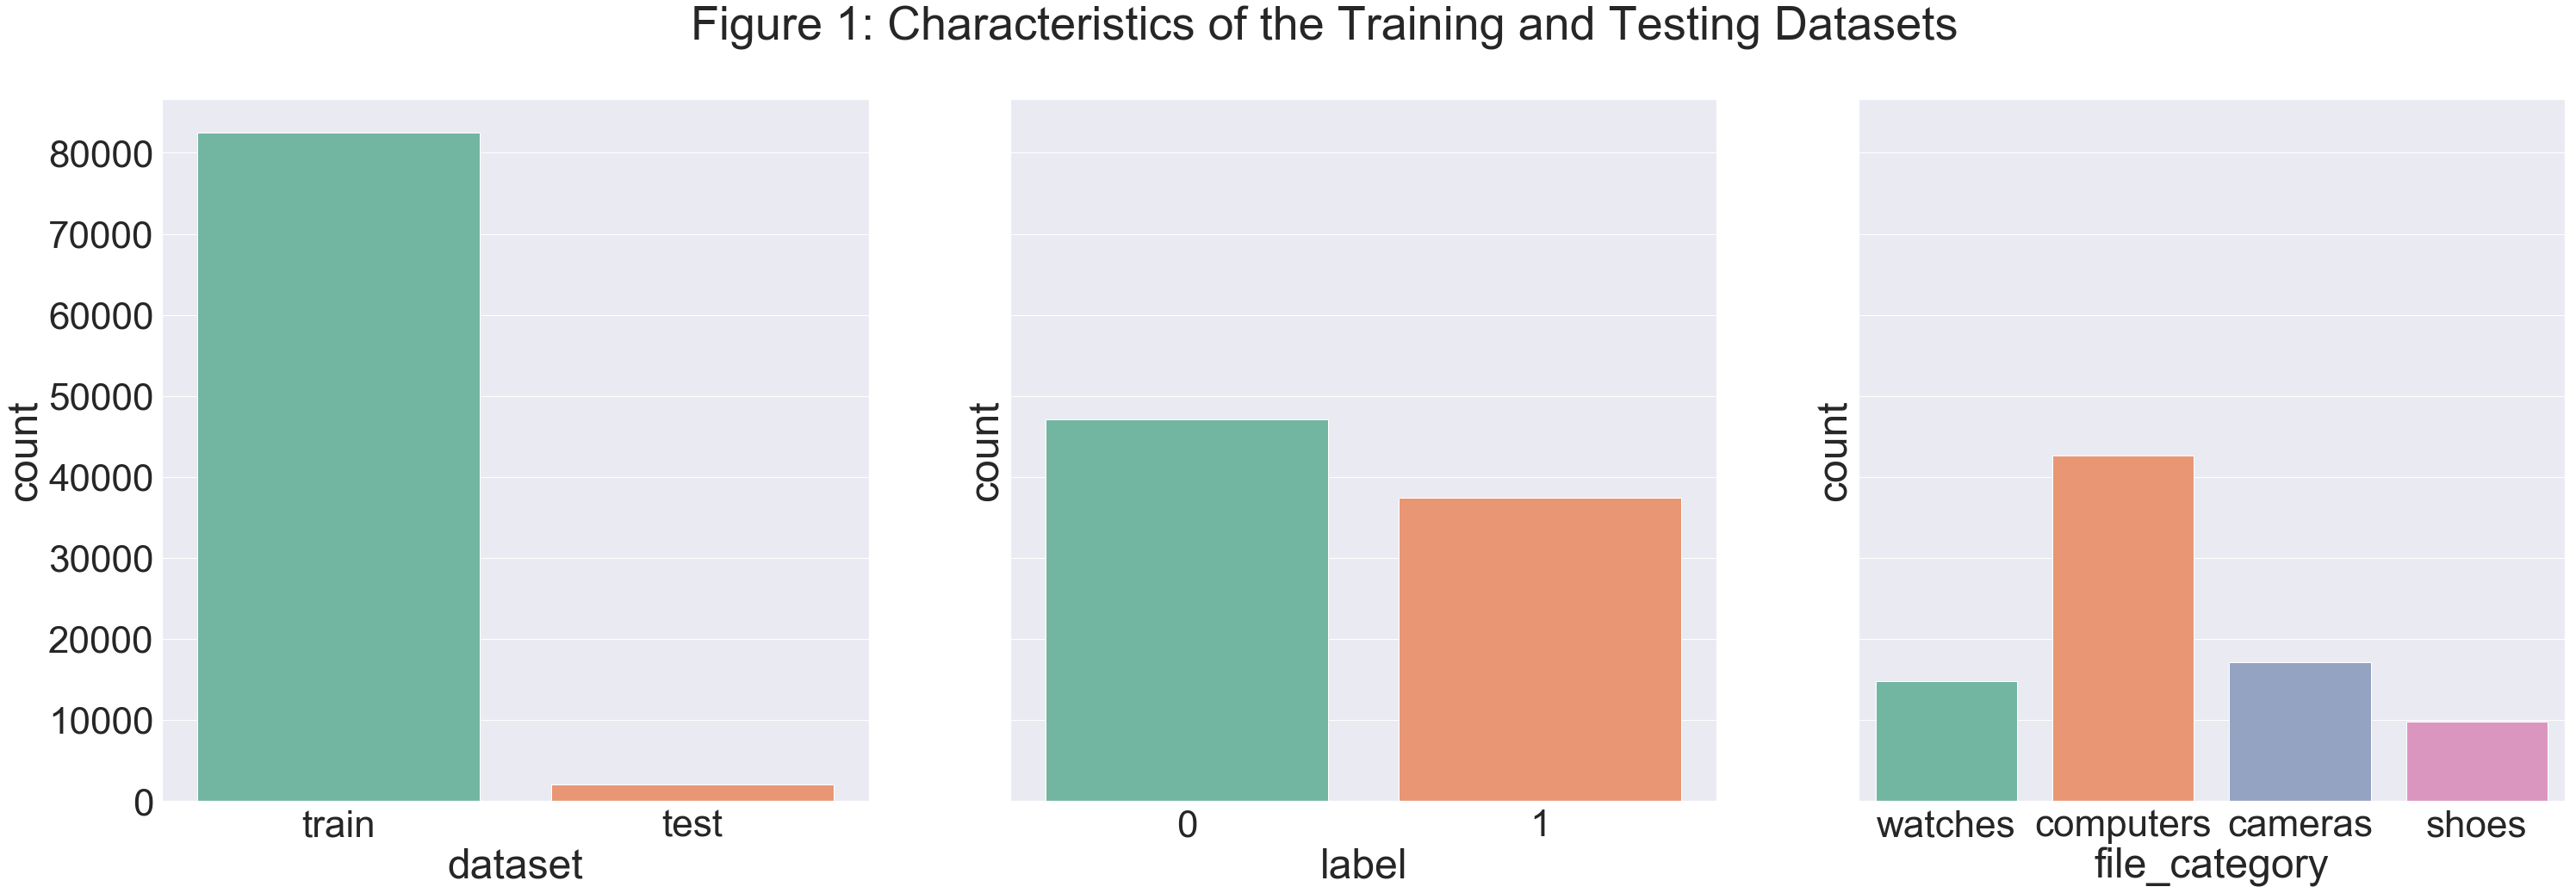

In [17]:
test_train_characteristics = train_test_feature_pairs[['label', 'dataset', 'file_category']]

os.chdir('c:/users/kyleg/Entity-Matching-in-Online-Retail/')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(50, 15), sharey=True) 

sns.set(font_scale=2)
plt.rcParams.update({'font.size': 45})
st = fig.suptitle("Figure 1: Characteristics of the Training and Testing Datasets")

sns.countplot(x='dataset', data=test_train_characteristics, palette=sns.color_palette("Set2"), ax=axes[0])

# mosaic plot: https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html
sns.countplot(x='label', data=test_train_characteristics, palette=sns.color_palette("Set2"), ax=axes[1])

sns.countplot(x='file_category', data=test_train_characteristics, palette=sns.color_palette("Set2"), ax=axes[2])

plt.savefig('plots/test_train_characteristics.png')

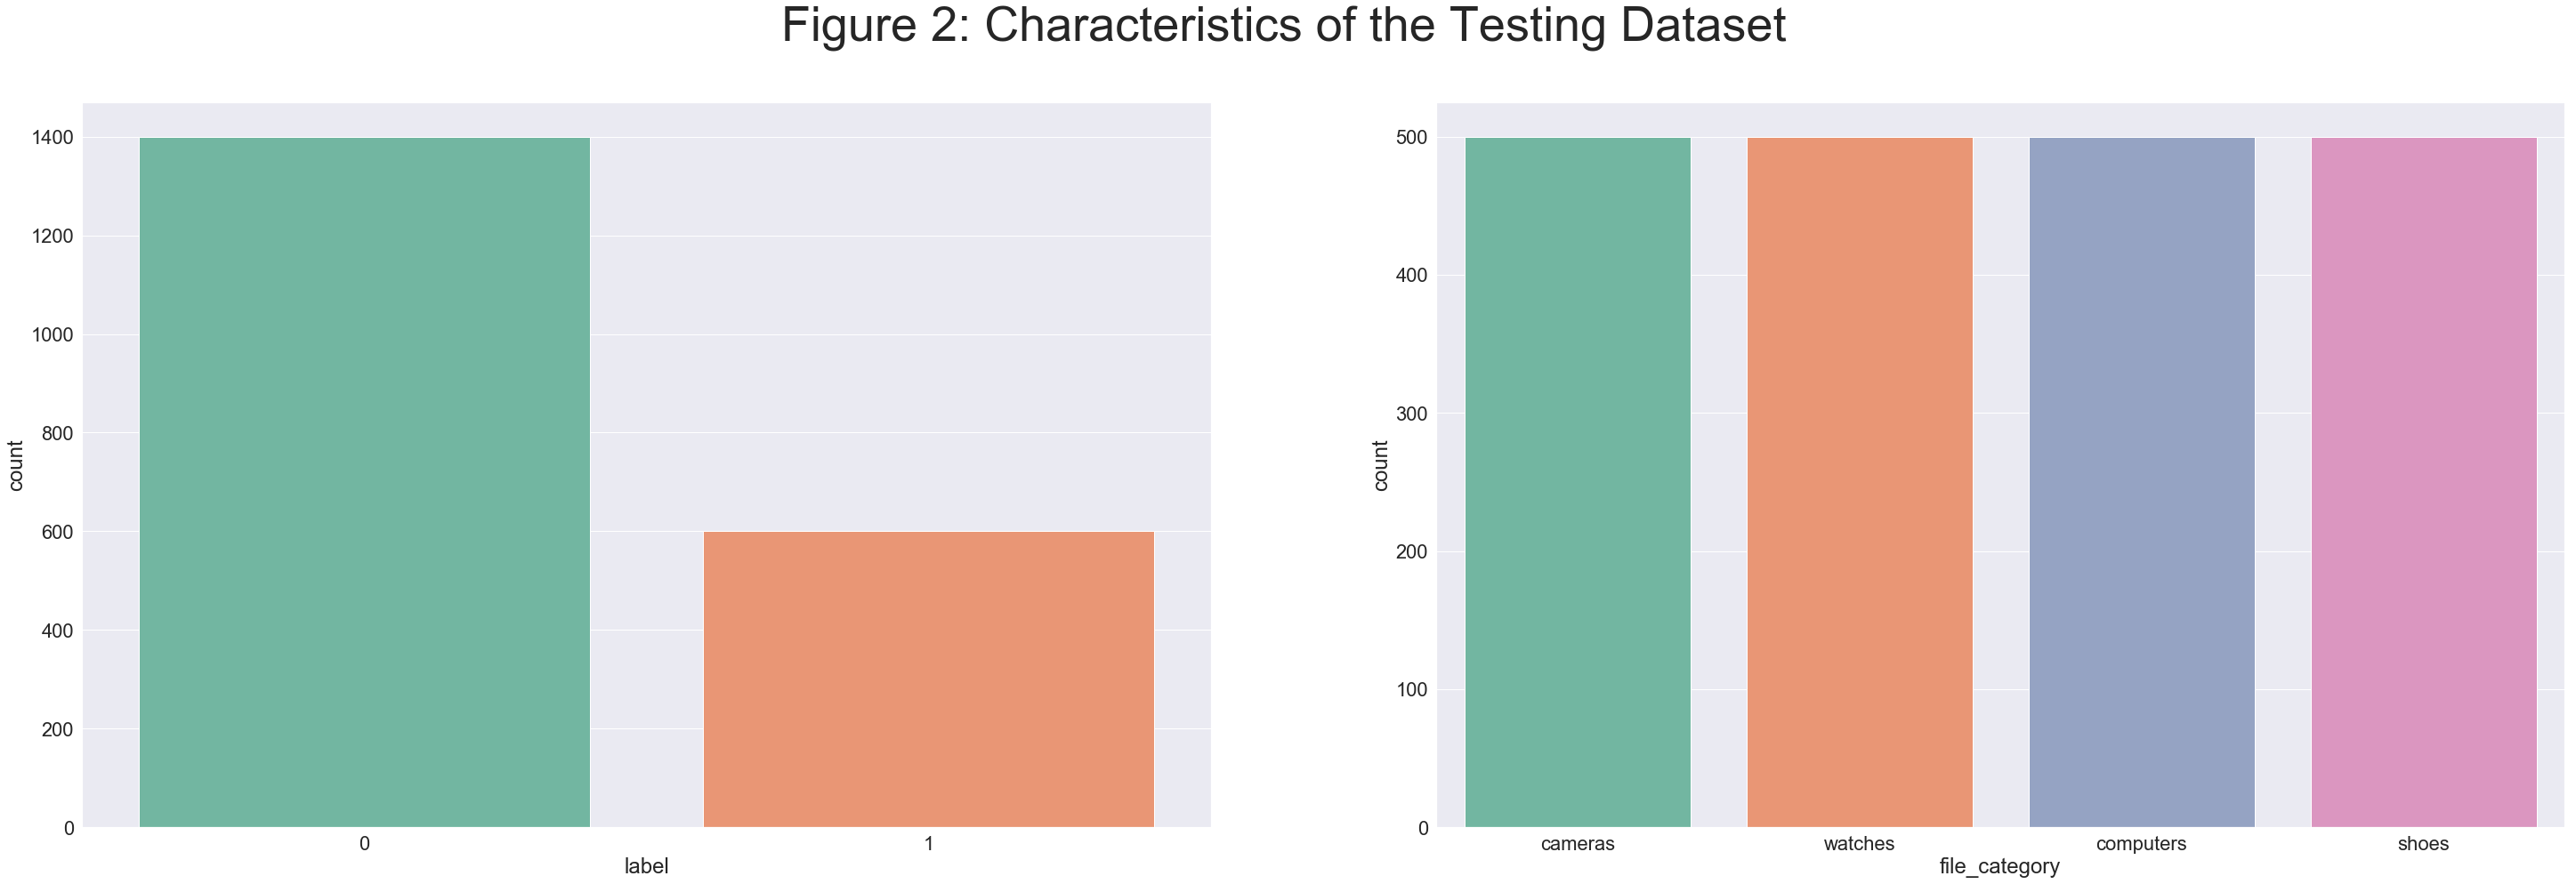

In [18]:
test_characteristics = test_train_characteristics[test_train_characteristics.dataset == 'test']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50, 15)) #

sns.set(font_scale=4)
plt.rcParams.update({'font.size': 45})
st = fig.suptitle("Figure 2: Characteristics of the Testing Dataset")

sns.countplot(x='label', data=test_characteristics, palette=sns.color_palette("Set2"), ax=axes[0])

sns.countplot(x='file_category', data=test_characteristics, palette=sns.color_palette("Set2"), ax=axes[1])

plt.savefig('plots/test_characteristics.png')

In [11]:
test_matches = train_test_feature_pairs[(train_test_feature_pairs.label == 1) &
                                      (train_test_feature_pairs.dataset == 'test')][['file_category', 
                                                                                   'name_1', 
                                                                                   'name_2']]\
.sample(4, random_state=1)

pd.set_option('display.max_colwidth', 0)
h = HTML(test_matches.to_html(index=False))
display(h)

my_file = open('plots/table_1_matched_offer_pairs.html', 'w')
my_file.write(h.data)
my_file.close()

file_category,name_1,name_2
shoes,nike sportswear air force 1 07 white,sneakers buty nike air force 1 07 low white 315122 111
computers,323146 b21 bl20p g2 1p xeon 3 06ghz,323146 b21 bl20p xeon 3 06ghz
watches,daniel wellington dapper sheffield rose gold,daniel wellington men s dapper 38mm sheffield rose watch
cameras,canon eos rebel t5i,canon eos rebel t5i 18 135mm is stm digital slr camera kit black


# Offer Features




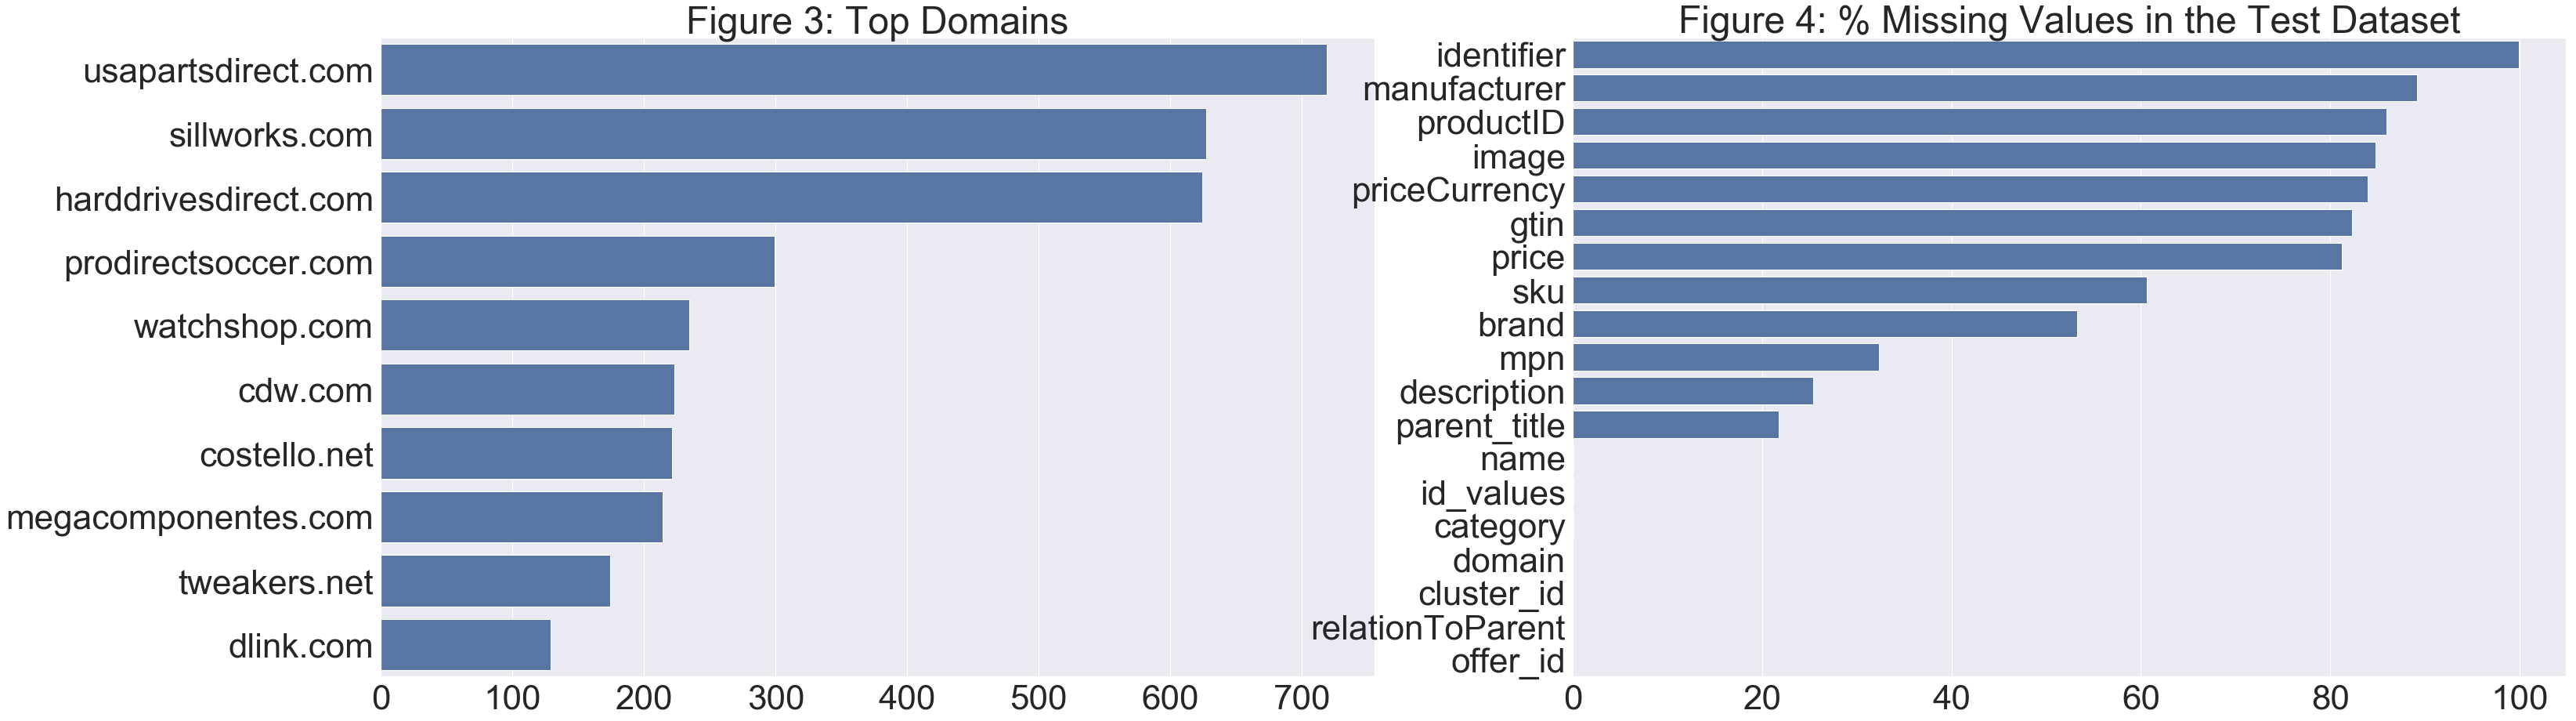

In [ ]:
# count words
name_length = train_test_offer_features.name.str.lower().str.split(expand=True).apply(lambda x: np.sum(pd.notnull(x)), 1).sort_values(ascending=False)
description_length = train_test_offer_features.description.str.lower().str.split(expand=True).apply(lambda x: np.sum(pd.notnull(x)), 1).sort_values(ascending=False)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50, 15), sharey=True)
sns.set(font_scale=4)

st = fig.suptitle("Figure 5: Number of Tokens in Name and Description Features")
sns.boxplot(y=name_length[20:].values, ax=axes[0]).set_title('Name')
sns.boxplot(y=description_length[500:].values, ax=axes[1]).set_title('Description')
fig.savefig("plots/name_description_tokens.png")

In [ ]:

print(np.median(name_length))
print(np.median(description_length))
description_length
train_test_offer_features.description[2:5].str.split(expand=True).apply(lambda x: np.sum(pd.notnull(x)), 1)

In [ ]:
sns.boxplot(y=description_length[1000:].values, ax=axes[1])

## Top Values by Attribute

In [21]:

train_test_normalized_features\
    .melt()\
    .dropna().groupby(['variable', 'value'])['value'].agg('count')\
    .to_frame()\
    .rename(index=str, columns={'value': 'value_counts'})\
    .reset_index()\
    .groupby(['variable'])\
    .apply(lambda x: x.nlargest(10, 'value_counts'))\
    .reset_index(drop=True)


NameError: name 'train_test_normalized_features' is not defined

In [ ]:
plt.figure(figsize=(11, 9))

offer_categories = train_test_offer_features.category.value_counts()
offer_categories_df = pd.DataFrame({'category': offer_categories.index, 'n': offer_categories})

sns.barplot(x='n', y='category', data=offer_categories_df)

sns.heatmap(train_test_offer_features[['brand', 'manufacturer']].isnull(), cbar=False)